# Homework 1
## Joe Morris, Amrit Sandhu, Aidan Cremins, Ben Kanarick, Mark Moreno - 10:30 Section

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances
from nltk.corpus import stopwords

We chose to analyze the entry level luxry forum on Edmunds at the following URL: https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans
We looked at the most recent 5,000 comments.

In [2]:
# Read in scraped CSV
df = pd.read_csv('data_last_few.csv')
df.head(5)

,username,date,message
0,2014-02-20T14:06:37+00:00,robr2,\n \n Someone better call marketing then: \n h...
1,2014-02-20T14:14:11+00:00,andys120,\n \n All what? This whole renaming scheme has...
2,2014-02-20T14:34:58+00:00,flightnurse,\n \n LOL... Oh well.... \n
3,2014-02-20T15:04:38+00:00,Michaell,"\n Isn't there going to be a 4-series ""grand c..."
4,2014-02-20T15:13:40+00:00,kyfdx,"\n \n l \n That's BMW's international website,..."


### Task A: 
Once you fetch the data, test if the data support Zipf’s law econometrically. Also plot the most 
common 100 words in the data against the theoretical prediction of the law. For this question, do not 
remove stopwords. Also do not perform stemming or lemmatization. 

In [3]:
# Clean Messages
df['clean_message'] = df['message'].str.replace('\...', ' ') # remove ellipses
df['clean_message'] = df['clean_message'].str.replace('\n', ' ') # remove newlines
df['clean_message'] = df['clean_message'].str.replace("'", '') # remove apostrophes
df['clean_message'] = df['clean_message'].str.replace('[^\w\s]',' ') # remove punctuation
df['clean_message'] = df['clean_message'].str.replace('\d+', '') # remove numbers
df['clean_message'] = df['clean_message'].str.lower() # make lowercase


df = df.dropna(subset=['clean_message'])  # remove nan from message column
df = df.reset_index(drop=True)
df.head(5)

<ipython-input-3-51c434396bed>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_message'] = df['message'].str.replace('\...', ' ') # remove ellipses
<ipython-input-3-51c434396bed>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_message'] = df['clean_message'].str.replace('[^\w\s]',' ') # remove punctuation
<ipython-input-3-51c434396bed>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_message'] = df['clean_message'].str.replace('\d+', '') # remove numbers


,username,date,message,clean_message
0,2014-02-20T14:06:37+00:00,robr2,\n \n Someone better call marketing then: \n h...,someone better call marketing then http...
1,2014-02-20T14:14:11+00:00,andys120,\n \n All what? This whole renaming scheme has...,all what this whole renaming scheme has t...
2,2014-02-20T14:34:58+00:00,flightnurse,\n \n LOL... Oh well.... \n,lol oh well
3,2014-02-20T15:04:38+00:00,Michaell,"\n Isn't there going to be a 4-series ""grand c...",isnt there going to be a series grand coup...
4,2014-02-20T15:13:40+00:00,kyfdx,"\n \n l \n That's BMW's international website,...",l thats bmws international website not ...


In [4]:
# get word frequency
word_freq = pd.Series(' '.join(df['clean_message']).split()).value_counts()
word_freq_100 = pd.Series(' '.join(df['clean_message']).split()).value_counts()[:100]
word_freq[:10]

the     23000
a       12430
to      10123
and      9638
i        7973
of       7358
is       6324
in       5832
that     5563
it       5277
dtype: int64

In [5]:
# Test Zipf's Law Econometrically
y = np.arange(1,len(word_freq)+1)
X = (word_freq.values / (len(word_freq) + 1)).reshape(-1,1)
ols = sm.OLS(np.log(y), np.log(X))
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          5.994e+06
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:22:14   Log-Likelihood:                         -11578.
No. Observations:               17289   AIC:                                  2.316e+04
Df Residuals:                   17288   BIC:                                  2.317e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0084      0.000  -2448.258      0.000      -1.009      -1.008
==============================================================================
Omnibus:                     1291.987   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1527.430
Skew:                           0.711   Prob(JB):                         0.00
Kurtosis:                       2.685   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
theta = ols_result.params[0]
se = ols_result.bse 

#Hypothesis Test theta = -1
t_stat = (theta - (-1)) / se
if abs(t_stat) > 2: 
    print(t_stat[0])
    print("The test statistic is statistically significantly different from the null hypothesis of theta = -1. Therefore, the top 100 word frequencies do not conform to Zipf's Law.")
else: 
    print("Conforms to Zipf's Law.")  

-20.295418674389868
The test statistic is statistically significantly different from the null hypothesis of theta = -1. Therefore, the top 100 word frequencies do not conform to Zipf's Law.


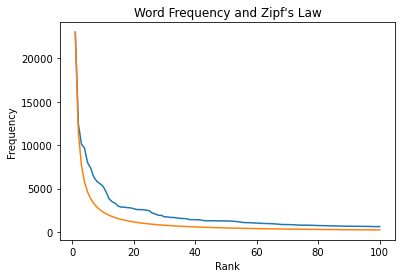

In [7]:
# top 100 words linear
plt.plot(np.arange(1,101), word_freq_100)
plt.plot(np.arange(1,101), word_freq_100[0]/np.arange(1,101))
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Word Frequency and Zipf\'s Law')
plt.show()

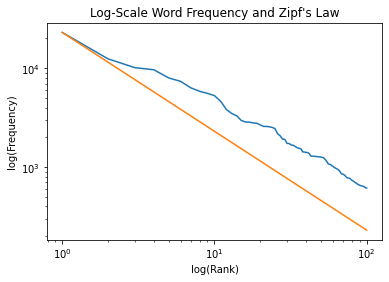

In [8]:
# top 100 words log-log scale
plt.loglog(np.arange(1,101), word_freq_100)
plt.loglog(np.arange(1,101), word_freq_100[0]/np.arange(1,101))
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title('Log-Scale Word Frequency and Zipf\'s Law')
plt.show()

### Task B: 
Find the top 10 brands from frequency counts. You will need to write a script to count the 
frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with 
brands so that from now on you have to deal with only brands and not models. You will need another 
script for this job. A list of model and brand names (not exhaustive) are provided in a separate file.   

In [9]:
# car brands and models
car_models = pd.read_csv('car models and brands (3).csv')
car_models.head()

,Brand,Model
0,acura,integra
1,acura,legend
2,acura,vigor
3,acura,rlx
4,acura,ilx


In [10]:
df['words'] = df['clean_message'].str.split()

def change_to_brand(phrase) :
    for place in range(len(phrase)) :
        if phrase[place] in car_models['Model'].values :
            result = np.where(car_models['Model'] == phrase[place])
            phrase[place] = str(car_models['Brand'][result[0][0]])
    return phrase
                
df['replace_model'] = df['words'].apply(change_to_brand)
df.head()

,username,date,message,clean_message,words,replace_model
0,2014-02-20T14:06:37+00:00,robr2,\n \n Someone better call marketing then: \n h...,someone better call marketing then http...,"[someone, better, call, marketing, then, http,...","[someone, better, call, marketing, then, http,..."
1,2014-02-20T14:14:11+00:00,andys120,\n \n All what? This whole renaming scheme has...,all what this whole renaming scheme has t...,"[all, what, this, whole, renaming, scheme, has...","[all, what, this, whole, renaming, scheme, has..."
2,2014-02-20T14:34:58+00:00,flightnurse,\n \n LOL... Oh well.... \n,lol oh well,"[lol, oh, well]","[lol, oh, well]"
3,2014-02-20T15:04:38+00:00,Michaell,"\n Isn't there going to be a 4-series ""grand c...",isnt there going to be a series grand coup...,"[isnt, there, going, to, be, a, series, grand,...","[isnt, there, going, to, be, a, series, grand,..."
4,2014-02-20T15:13:40+00:00,kyfdx,"\n \n l \n That's BMW's international website,...",l thats bmws international website not ...,"[l, thats, bmw, international, website, not, t...","[l, thats, bmw, international, website, not, t..."


In [11]:
# removes duplicate words so only 1 brand per message make set then back to list
df['set_words_brands'] = df['replace_model'].apply(lambda x: list(set(x)))

all_words_brands = []
for i in range(len(df['set_words_brands'])) :
    all_words_brands += df['set_words_brands'][i]

brands_word_freq = pd.Series(' '.join(all_words_brands).split()).value_counts()
brands_word_freq = brands_word_freq[brands_word_freq.index.isin(car_models['Brand'])]
brands_word_freq = brands_word_freq.drop(['car', 'sedan', 'seat', 'problem'])

brands_df = pd.DataFrame(brands_word_freq[:10])
brands_df.rename(columns = {0:'Frequency'}, inplace = True)
brands_df

,Frequency
bmw,893
audi,622
acura,503
honda,424
volkswagen,258
mercedes,218
cadillac,205
toyota,203
hyundai,188
infiniti,165


### Task C:
Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have 
to write a script to do this task). For lift calculations, be sure not to count a mention more than once 
per post, even if it is mentioned multiple times in the post.

In [12]:
# lift function
def lift(brand1, brand2) :
    brand1_count = brands_word_freq[brand1]
    brand2_count = brands_word_freq[brand2]
    both_count = df['set_words_brands'].apply(lambda x: brand1 in x and brand2 in x).sum()
    return len(df) * (both_count / (brand1_count * brand2_count))

lifts = pd.DataFrame(index = brands_word_freq.index[:10], columns = brands_word_freq.index[:10])
for brand1 in brands_word_freq.index[:10] :
    for brand2 in brands_word_freq.index[:10] :
        lifts[brand1][brand2] = lift(brand1, brand2)

# make diagonal blank
for brand in brands_word_freq.index[:10] :
    lifts[brand][brand] = ''

lifts

,bmw,audi,acura,honda,volkswagen,mercedes,cadillac,toyota,hyundai,infiniti
bmw,,2.418417,1.551497,1.253724,1.358976,0.856047,2.151695,1.560026,1.504015,2.639044
audi,2.418417,,2.21133,1.972297,2.643386,0.707617,3.524822,2.239716,1.900185,3.739647
acura,1.551497,2.21133,,3.835947,1.323069,0.598701,2.546671,1.730993,1.815702,4.989457
honda,1.253724,1.972297,3.835947,,2.077391,0.382443,1.626783,3.637652,2.154004,2.45426
volkswagen,1.358976,2.643386,1.323069,2.077391,,0.359149,1.527699,2.314125,1.978187,2.253935
mercedes,0.856047,0.707617,0.598701,0.382443,0.359149,,1.017006,0.114114,0.0,0.701974
cadillac,2.151695,3.524822,2.546671,1.626783,1.527699,1.017006,,2.184309,2.489621,5.225425
toyota,1.560026,2.239716,1.730993,3.637652,2.314125,0.114114,2.184309,,3.96971,2.713838
hyundai,1.504015,1.900185,1.815702,2.154004,1.978187,0.0,2.489621,3.96971,,3.58156
infiniti,2.639044,3.739647,4.989457,2.45426,2.253935,0.701974,5.225425,2.713838,3.58156,


### Task D: 
Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there 
are multiple scripts available on GitHub). 

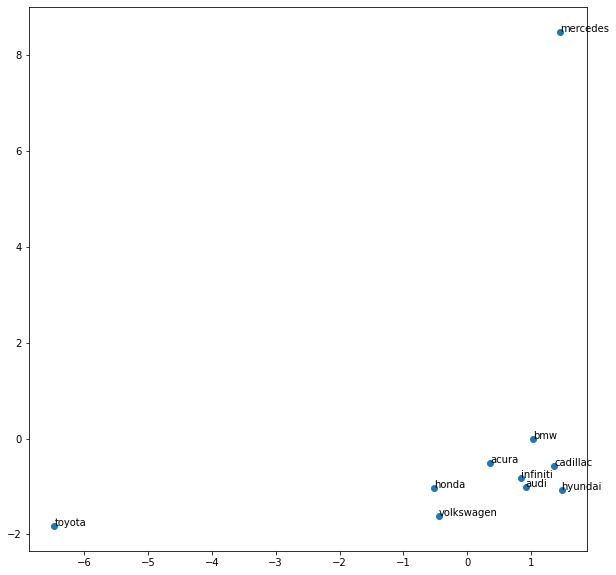

In [13]:
# show brands on a multi-dimensional scaling plot taken from github

def dissimilarity(x):
    if(x == 0):
        return 1
    elif(x != ''):
        return 1 / x 
    else:
        return 0

# get inverse of values of lifts
lifts_inverse = lifts.applymap(dissimilarity)
# get euclidean distances
dist = euclidean_distances(lifts_inverse)

# get mds
mds = MDS(n_components=2, dissimilarity="precomputed", random_state = 4)
position = mds.fit_transform(dist)

plt.figure(figsize=(10,10))
plt.scatter(position[:, 0], position[:, 1])
for label, x, y in zip(lifts.index, position[:, 0], position[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()


### Task E: 
What insights can you offer to your client from your analyses in Tasks C and D 

-From the MDS plot above, the most obvious trend is that Mercedes and Toyota are very far away from the other brands. This suggests that customers of these brands are very loyal and don't do much cross-shopping between brands. 

-For Mercedes, this is good news as people see their luxury cars as being much different from other luxury brands. Although we didn't do sentiment analysis, we assume that this is a positive in that Mercedes is seen as a better level of luxury than other brands. 

-For Toyota, the fact that it's isolated from other brands is likely because Toyotas are generally base level cars and are not typically seen as luxury. Given that we analyzed an entry level luxury forum, it makes sense that Toyotas would stick out. Another explanation could be the fact that Toyota has a luxury brand in Lexus which was not one of the top 10 brands in the MDS plot and mentions of "Toyota" are serving as a rough proxy for "Lexus". For this to be true, Lexus would have to be seen as a different level of luxury than the other brands which would explain why Toyota/Lexus is isolated.

-There's another grouping of Honda and Volkswagen that appear to be slightly apart from the other brands. This makes sense because like Toyota, both of these brands aren't typically seen as luxury brands and are more starter-level cars. It may be the case that Toyota is the default “non-luxury” brand that people think of. This then could explain why Toyota is so much more isolated than Honda and Volkswagen if it's only mentioned as being distinctly non-luxury whereas that distinction may not be as clear for Honda and Volkswagen.

-The remaining grouping of brands is comprised essentially of luxury brands. Among this cluster, we find Audi in the center. This suggests that Audi is the brand that’s most compared to others. Audi seems to be the average entry level luxury brand that people tend to think of and use frequently in comparisons. In fact, in the Edmunds entry level luxury forum description, the Audi A4 (along with the BMW 330) is described as being the baseline car of entry level luxury.


### Task F:
What are 5 most frequently mentioned attributes or features of cars in the discussions? 
Which attributes are most strongly associated with which of these 5 brands? You DON’T have to do 
a sentiment analysis for this assignment.

In [14]:
# get word frequency
unique_word_freq = pd.Series(' '.join(all_words_brands).split()).value_counts()

# remove stop words
stop_words = set(stopwords.words('english'))
unique_word_freq = unique_word_freq[~unique_word_freq.index.isin(stop_words)]

# 5 most prominent attributes from the data set
attributes = ['price','sport', 'performance', 'luxury', 'power']

print('Frequency of top 5 attributes:')
for word in attributes :
    print(word + ': ' + str(unique_word_freq[word]))

#Lift function
def lift_new(one, two) :
    one_count = unique_word_freq[one]
    two_count = unique_word_freq[two]
    both_count = df['set_words_brands'].apply(lambda x: one in x and two in x).sum()
    return len(df) * (both_count / (one_count * two_count))

attribute_lifts = pd.DataFrame(index = brands_word_freq.index[:5], columns = attributes) 

for brand in brands_word_freq.index[:5] :
    for attribute in attributes :
        attribute_lifts[attribute][brand] = lift_new(brand, attribute)

attribute_lifts

# For each attribute, print the top 5 brands that are most associated with that attribute
attrRanks = pd.DataFrame(index = attributes, columns = [1, 2, 3, 4, 5])

for attribute in attributes :
    # get top 5 brands
    top5 = attribute_lifts[attribute].sort_values(ascending = False)[:5]
    # add to dataframe
    for i in range(5) :
        attrRanks[i + 1][attribute] = top5.index[i]
print('')
print('Top brands for top 5 attributes by lift:')
attrRanks.T

Frequency of top 5 attributes:
price: 439
sport: 337
performance: 306
luxury: 280
power: 245

Top brands for top 5 attributes by lift:


,price,sport,performance,luxury,power
1,audi,bmw,audi,acura,audi
2,bmw,honda,bmw,honda,volkswagen
3,honda,audi,acura,audi,acura
4,acura,acura,volkswagen,volkswagen,honda
5,volkswagen,volkswagen,honda,bmw,bmw


### Task G:
What advice will you give to your client from Task F? For this assignment, you can assume 
that all sentiments are positive. 


Audi appears to be the premier luxury brand among the top 5 most mentioned as it's the highest rated in 3 of the 5 top attributes: performance, price, and power. It's unclear whether being the highest ranked in price is a good thing. It might mean that Audis are generally viewed as reasonably priced for their level of quality, or that people think they're overpriced. Since we didn't capture sentiment, our analysis can't make this distinction.

Another interesting aspect of the table above is that Acura is the top brand in terms of luxury followed by Honda which as mentioned above is a more base level brand. A possible explanation for this is that Acura is owned by Honda and is operated as Honda's luxury brand. This could mean that many people are talking about Acura/Honda and luxury together not because people see these brands as the most luxurious, but because people are trying to distinguish between the higher-end Acura brand and its more basic owner brand: Honda. If this were the case, Audi would be the next up in terms of luxury ranking which again supports it being one of the best luxury brands.

The one brand who would likely be most disappointed by these results is BMW as they scored the worst in terms of luxury. As mentioned above, the luxury rankings might be slightly inaccurate due to comparisons being made between Acura and Honda. Nevertheless, BMW is typically viewed as a comparable luxury brand to brands like Audi and Mercedes (not one of the top 5 brands) and should be disappointed that consumers seem to be talking about Audi more favorably in every category except sport.

### Task H:
Which is the most aspirational brand in your data in terms of people actually wanting to buy 
or own? Describe your analysis. What are the business implications for this brand?

In [15]:
# aspirational phrases in a list
aspirational = [
    'dream car',
    'i wish',
    'i dream',
    'i hope to',
    'i plan to',
    'hope i can',
    'i aspire to',
]


def aspirational_in_message(message) :
    for phrase in aspirational :
        if phrase in message :
            return True
    return False

# find phrases in apsirational list in clean_message
df['aspirational'] = df['clean_message'].apply(aspirational_in_message)

newVar = df[df['aspirational'] == True]

# make aspiration message words a set for cases where two aspirations are in one message
df['aspiration_brand_set_words'] = df[df['aspirational']]['set_words_brands']
df['aspiration_brand_set_words'] = df['aspiration_brand_set_words'].fillna('')
df['aspiration_brand_set_words'] = df['aspiration_brand_set_words'].apply(lambda x: x + ['aspiration'] if x != '' else x)

aspir_words_brands = []
for i in range(len(df['aspiration_brand_set_words'])) :
    aspir_words_brands += df['aspiration_brand_set_words'][i]

aspir_word_freq = pd.Series(' '.join(aspir_words_brands).split()).value_counts()

#Lift function
def lift_aspiration(one, two) :
    # brands out of all the messages
    one_count = unique_word_freq[one]
    two_count = aspir_word_freq[two]
    both_count = df['aspiration_brand_set_words'].apply(lambda x: one in x and two in x).sum()
    return len(df) * (both_count / (one_count * two_count))

aspiration_lifts = pd.DataFrame(index = brands_word_freq.index[:10], columns = ['aspiration']) 

for brand in brands_word_freq.index[:10] :
    aspiration_lifts['aspiration'][brand] = lift_aspiration(brand, 'aspiration')

#Rename column to more informative name
aspiration_lifts.rename(columns = {'aspiration':'Aspiration Lift'}, inplace = True)
aspiration_lifts.sort_values(by='Aspiration Lift',ascending=False)


,Aspiration Lift
bmw,2.639044
toyota,2.487685
cadillac,1.642276
audi,1.623794
volkswagen,1.30491
infiniti,1.020202
honda,0.794025
acura,0.669317
mercedes,0.0
hyundai,0.0


For our analysis of aspirational brands, we searched for 7 key phrases that we thought were suggestive of aspiration:  “dream car”, “i wish”, “i dream”, “i hope to”, “i plan to”, “hope i can”, and “i aspire to” within the comments in our data frame. We replaced each of these phrases with the word "aspiration" in the comments. We then found which brand/s were mentioned in the comments with the word "aspiration" and computed the lift for each of the top 10 brands and the word "aspiration". Unfortunately, this approach only captured 30 comments that even contained aspirational phrases which is a small sample size. Moreover, a quick manual check of these comments revealed that they weren’t all related to people’s aspirations to buy cars. Since we didn’t capture sentiment or context, our analysis returned comments like someone who said “I hope to do more instructing this year” along with desired comments about people hoping to buy a specific car/brand. Had we gotten a larger total number of comments to analyze, we would’ve been able to look at a larger sample of aspirational comments and this procedure likely would’ve been more successful. 

Another potential issue is that we didn't compute the directionality of aspiration. For example, if someone said "I dream to get rid of my Toyota and buy an Audi", both Toyota and Audi would be associated with the aspirational phrase "I dream" since they're in the same comment despite Audi being the true aspirational brand in this context. This is perhaps why Toyota appears as the second most aspirational brand as its capturing people who are dreaming to switch away from their Toyota to something more luxurious.

Nevertheless, our imperfect analysis revealed that BMW is the most aspirational brand as indicated by it having the highest lift score. This result seems plausible since BMW is a well known luxury brand, and it makes sense that people in an entry level luxury forum would talk about wanting to buy one. In fact, we saw earlier that it’s the most frequently mentioned brand overall. BMW could leverage their apparent popularity and aspirational image among users of this forum by ensuring that they continue to market their cars as worth saving up for and making the jump into luxury for.

It's interesting that BMW is the most aspirational brand despite not ranking the best in the table from Task F. While Audi appeared to be viewed the most favorably from that table, their aspirational lift is certainly behind BMW's. For some reason, people seem to think Audis are better cars, but are aspiring to own BMWs. Perhaps this is indicative of BMW having a stronger image as a luxury brand to overcome its technical inferiority to Audi. It also could reflect our flawed procedure in measuring aspiration, and Audi may indeed end up as a more aspirational brand than BMW if we collected more messages.